# Linear (ordinary) least squares

Suppose we have a set of points $\left\{ (x_i, y_i), i = 1, \ldots, n \right\}$ and a functional form $f(x, \vec \beta)$, where $\vec \beta$ is a vector of parameters.

Then, *least squares approximation* is a problem of finding $\vec \beta$ by minimising function
$$ \xi (\vec \beta) = \sum\limits_{i = 1}^n \left| y_i - f(x_i, \vec \beta) \right|^2 $$

Least squares approximation becomes *linear (or ordinary)* when we assume that $f(x, \vec \beta)$ is a linear function of $\vec \beta$: 
$$f(x, \vec \beta) = \sum \limits_{j = 1}^m \beta_j \varphi_j (x),$$
where $\varphi_j (x)$ are called basis functions which do not need to be linear ($x^k$, $e^{i \alpha_k x}$ etc.).

We minimize with respect to $\vec \beta$
$$ \xi (\vec \beta) = \sum\limits_{i = 1}^n \left| y_i - \left( \beta_1 \varphi_1(x) + \ldots + \beta_m \varphi_m(x) \right) \right|^2 .$$
It can be represented as 
$$\xi (\vec \beta) = || \vec y - A \vec \beta ||^2,$$
if we suppose that a vector norm $||\vec a|| = \sqrt{\sum\limits_{i = 1}^n |a_i|^2}$ and *the design matrix*
$$ A = \begin{pmatrix} 
            \varphi_1(x_1) & \varphi_2(x_1) & \ldots & \varphi_m(x_1) \\
            \varphi_1(x_2) & \varphi_2(x_2) & \ldots & \varphi_m(x_2) \\
            \vdots & \vdots & \ddots & \vdots \\
            \varphi_1(x_n) & \varphi_2(x_n) & \ldots & \varphi_m(x_n) \\
        \end{pmatrix}.$$

To minimize $\xi (\vec \beta)$ we set 
$$\cfrac{\partial}{\partial \beta_k} \xi (\vec \beta) = 0, \; k = 1, \ldots, m, $$
and obtain *the normal equation*
$$A^T A \vec \beta = A^T \vec y.$$

If $A$ is poorly conditioned, then solving this matrix equation becomes a big problem. In this case QR decomposition of $A$ is often used. The design matrix can be represented as 
$$A = Q \cdot R,$$
where $Q$ is orthoginal ($Q^T Q = 1$), and $R$ is upper triangular.

Since $m < n$ last $n-m$ rows of $R$ are zero:
$$A = Q \cdot \begin{pmatrix} 
                    R_1 \\
                    0 \\
                \end{pmatrix}.$$
Recall tht matrix $Q$ is a rotation operator, and introduced norm of a vector is invariant to rotation. Then, we rotate the residual $\vec y - A \vec \beta$:
$$\xi (\vec \beta) = || \vec y - A \vec \beta ||^2 = || Q^T \left( \vec y - A \vec \beta \right) ||^2 = || Q^T \vec y - \begin{pmatrix} 
    R_1 \\
    0 \\
\end{pmatrix} \vec \beta ||^2. $$

Let us write 
$$Q^T \vec y = \begin{pmatrix} 
                    \vec f \\
                    \vec r \\
                \end{pmatrix},$$
where $\mbox{dim} \vec f = m$.

This way,
$$\xi ( \vec \beta ) = ||\vec f - R_1 \vec \beta||^2 + ||\vec r||^2 \rightarrow \min \Leftrightarrow R_1 \vec \beta = \vec f.$$

The last equation is solved by back substitution.

## Task

Let the basis function be $x^k, \; k = 0, \ldots, m$. Write function that finds $\vec \beta$ for $m = 1, 2, 3$.

In [4]:
import numpy as np
def linear_least_squares(m, xdata, ydata):
    A = np.zeros((len(xdata), m+1))
    for i in range(len(xdata)):
        A[i] = np.array([np.power(xdata[i], j) for j in range(0,m+1)])
    q, r = np.linalg.qr(A)
    beta = np.linalg.inv(r)@q.T@ydata
    return beta

Now implement your function to approximate real data.

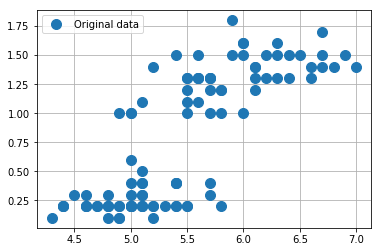

In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt

diabetes = datasets.load_iris()
X = diabetes.data
y = diabetes.target

ydata = X[:100,-1]
xdata = X[:100,0]

plt.plot(xdata, ydata, 'o', label='Original data', markersize=10)
plt.grid(True)
plt.legend()
plt.show()

Plot the resulting functions.

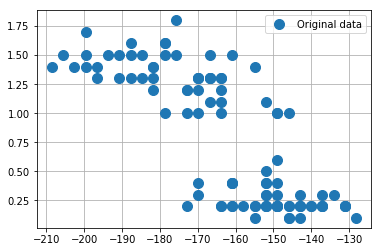

In [12]:
plt.plot(beta[1]*xdata, ydata, 'o', label='Original data', markersize=10)
plt.grid(True)
plt.legend()
plt.show()

Output the comma-separated list of coefficients before $x$. You will need this for Google Form.

In [5]:
coefs = []

# assuming that beta[1] is always a coefficient before x
for m in range(1, 4):
    coefs.append(str(linear_least_squares(m, xdata, ydata)[1]))
    
print(",".join(coefs))

0.6954194559668743,1.7384067440850322,-29.799373906751665


Output the comma-separated list of average quadratic deviations. You will need this for Google Form.

*Reminder*: Average quadratic deviation = $\cfrac{1}{n} \sum\limits_{i = 1}^{n} \left| y_i - f(x_i, \vec \beta) \right|^2 $, where $n$ is the number of observations.

In [9]:
def qd(x):
    return np.sum(np.abs(np.power(x, 2)))

In [10]:
aqds = []

for m in range(1, 4):
    beta = linear_least_squares(m, xdata, ydata)
    cur_aqd = qd(ydata - beta@[np.power(xdata, i) for i in range(m+1)])/len(xdata)
    aqds.append(str(cur_aqd))
    
print(",".join(aqds))

0.11905675675012695,0.11723045717241183,0.10488910133708018
